#### Import Required Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB, BernoulliNB, ComplementNB
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler

#### Explore dataset

In [2]:
data=pd.read_csv("dataset_phishing.csv")
data.head(10)

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate
5,http://appleid.apple.com-app.es/,32,24,0,3,1,0,0,0,0,...,1,1,1,0,-1,0,0,1,0,phishing
6,http://www.mutuo.it,19,12,0,2,0,0,0,0,0,...,0,1,0,170,7529,0,0,0,1,legitimate
7,http://www.shadetreetechnology.com/V4/validati...,81,27,1,2,0,0,0,0,0,...,1,0,0,76,5767,0,0,1,2,phishing
8,http://vamoaestudiarmedicina.blogspot.com/,42,34,0,2,0,0,0,0,0,...,1,1,0,371,7298,0,0,0,5,legitimate
9,https://parade.com/425836/joshwigler/the-amazi...,104,10,0,1,10,0,0,0,0,...,1,0,0,128,9368,6774,0,0,5,legitimate


In [3]:
print(" The number of rows is:",data.shape[0],"\n","The numbe of features is:",data.shape[1])

 The number of rows is: 11430 
 The numbe of features is: 89


#### Dataset Information

* Target Variable is : status with
  * legitimate (considered as Label 1)
  * phishing (considered as Label 0)
* 87 Features around URL , all Numerical ,are from three different classes
  * 56 extracted from the Structure and Syntax of URLs (fields starting with : nb_ , shortest/longest , ratio/length etc)
  * 24 extracted from the Content of their correspondent pages
  * 7 are extracted by querying External Services

In [4]:
leg=data[data["status"]=="legitimate"].url.count()
phishing=data[data["status"]=="phishing"].url.count()
print(" The number of legimiate and phishing websites in this dataset")
print(" legitimate:",leg,"\n","phishing:",phishing)

 The number of legimiate and phishing websites in this dataset
 legitimate: 5715 
 phishing: 5715


In [5]:
data.describe()
# max values shows the outliers

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [6]:
# change status to numerical 1 for phishing and 0 for legitimate websites
data['target']=pd.get_dummies(data['status'])['legitimate'].astype('int')
data.drop('status',axis=1,inplace=True)
data[['url','target']].head(5)

,url,target
0,http://www.crestonwood.com/router.php,1
1,http://shadetreetechnology.com/V4/validation/a...,0
2,https://support-appleld.com.secureupdate.duila...,0
3,http://rgipt.ac.in,1
4,http://www.iracing.com/tracks/gateway-motorspo...,1


In [7]:
data.drop('url',axis=1,inplace=True)

In [8]:
# search for missing values in dataset
temp=data.isnull().sum().reset_index(name='missing_val')
temp[temp["missing_val"]!=0]

,index,missing_val


#### Feature Selection

##### Corrolation

In [85]:
threshold=0.2
corr_matrix = data.corr()
temp=pd.DataFrame(corr_matrix['target'].sort_values(ascending=False))
features_corr=temp[abs(temp["target"])>threshold].index[1:]
features_corr

Index(['google_index', 'ratio_digits_url', 'domain_in_title', 'phish_hints',
       'ip', 'nb_qm', 'length_url', 'nb_slash', 'length_hostname', 'nb_eq',
       'ratio_digits_host', 'shortest_word_host', 'prefix_suffix',
       'longest_word_path', 'tld_in_subdomain', 'empty_title', 'nb_dots',
       'longest_words_raw', 'ratio_intHyperlinks', 'domain_age',
       'nb_hyperlinks', 'nb_www', 'page_rank'],
      dtype='object')

##### Information Gain

In [20]:
X=data.loc[:, ~data.columns.isin(['target'])]
y=data['target']

In [21]:
# determine the mutual information
mutual_info = mutual_info_classif(X,y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

google_index           0.299576
web_traffic            0.299389
domain_age             0.278746
ratio_extHyperlinks    0.237765
ratio_intHyperlinks    0.237302
                         ...   
random_domain          0.000000
onmouseover            0.000000
popup_window           0.000000
sfh                    0.000000
iframe                 0.000000
Length: 87, dtype: float64

In [22]:
#we Will select the top 20 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=20)
sel_five_cols.fit(X,y)
features_ig=X.columns[sel_five_cols.get_support()]

Index(['nb_www', 'ratio_digits_url', 'char_repeat', 'longest_words_raw',
       'longest_word_path', 'avg_word_host', 'avg_word_path', 'phish_hints',
       'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks',
       'ratio_extRedirection', 'ratio_extErrors', 'links_in_tags',
       'safe_anchor', 'domain_registration_length', 'domain_age',
       'web_traffic', 'google_index', 'page_rank'],
      dtype='object')

In [24]:
feature=features_corr
X=data.loc[:, data.columns.isin(feature)]
y=data['target']

,nb_www,ratio_digits_url,char_repeat,longest_words_raw,longest_word_path,avg_word_host,avg_word_path,phish_hints,nb_hyperlinks,ratio_intHyperlinks,ratio_extHyperlinks,ratio_extRedirection,ratio_extErrors,links_in_tags,safe_anchor,domain_registration_length,domain_age,web_traffic,google_index,page_rank
0,1,0.000000,4,11,6,7.00,4.500000,0,17,0.529412,0.470588,0.875000,0.500000,80.000000,0.000000,45,-1,0,1,4
1,0,0.220779,4,32,32,19.00,14.666667,0,30,0.966667,0.033333,0.000000,0.000000,100.000000,100.000000,77,5767,0,1,2
2,0,0.150794,2,17,17,8.40,8.142857,0,4,1.000000,0.000000,0.000000,0.000000,100.000000,100.000000,14,4004,5828815,1,0
3,0,0.000000,0,5,0,5.00,0.000000,0,149,0.973154,0.026846,0.250000,0.250000,100.000000,62.500000,62,-1,107721,0,3
4,1,0.000000,3,11,11,5.00,7.000000,0,102,0.470588,0.529412,0.537037,0.018519,76.470588,0.000000,224,8175,8725,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11425,1,0.000000,4,11,11,6.00,9.500000,0,199,0.884422,0.115578,0.043478,0.173913,80.000000,0.000000,448,5396,3980,0,6
11426,1,0.023810,3,10,8,6.50,4.900000,0,3,1.000000,0.000000,0.000000,0.000000,100.000000,0.000000,211,6728,0,1,0
11427,1,0.142857,5,15,15,5.50,6.272727,0,68,0.470588,0.529412,0.000000,0.000000,6.250000,80.000000,2809,8515,8,1,10
11428,1,0.000000,3,22,0,12.50,0.000000,0,32,0.375000,0.625000,0.050000,0.050000,16.666667,0.000000,85,2836,2455493,0,4


In [25]:
Scaler = StandardScaler(copy=True , with_mean=True , with_std=True)
X = pd.DataFrame(Scaler.fit_transform(X))

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    shuffle = True)

### Machine Learning Models

#### Random Forest

In [122]:
model_random_forest = RandomForestClassifier(n_estimators=200, 
                                             random_state=42)
model_random_forest.fit(X_train,y_train)                                         

RandomForestClassifier(n_estimators=200, random_state=42)

In [123]:
y_predicted=model_random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_predicted)
print('Model Accuracy: {0:4f}'.format(accuracy))
oconfusion_matrix = confusion_matrix(y_test, y_predicted)
print('Confusion Matrix: \n {}'.format(oconfusion_matrix))

Model Accuracy: 0.961067
Confusion Matrix: 
 [[1083   46]
 [  43 1114]]


#### SVM

In [152]:
# Building a Support Vector Machine on train data
svc_model = SVC(C=0.01,kernel="sigmoid" , max_iter=10000 , gamma="auto",probability=True)

In [153]:
svc_model.fit(X_train, y_train)

SVC(C=0.01, gamma='auto', kernel='sigmoid', max_iter=10000, probability=True)

In [154]:
prediction = svc_model .predict(X_test)
accuracy = accuracy_score(y_test, prediction)
print('Model Accuracy: {0:4f}'.format(accuracy))
oconfusion_matrix = confusion_matrix(y_test, prediction)
print('Confusion Matrix: \n {}'.format(oconfusion_matrix))

Model Accuracy: 0.916448
Confusion Matrix: 
 [[1055   74]
 [ 117 1040]]


#### K-nearest Neighbor

In [32]:
neighbour = []
accuracy = []
for k in range(1, 10):
      k_near = KNeighborsClassifier(n_neighbors=k)
      k_near.fit(X_train, y_train)
      Y_pre_test = k_near.predict(X_test)
      test_accurry = accuracy_score(Y_pre_test, y_test)
      neighbour.append(k)
      accuracy.append(test_accurry)

Text(0, 0.5, 'accuracy')

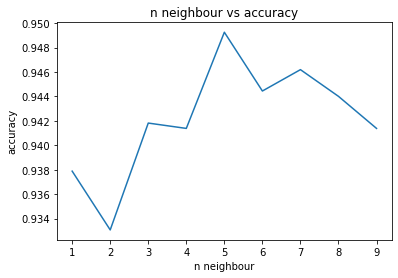

In [33]:
# plotting for n neighbour vs accuracy
plt.plot(neighbour, accuracy)
plt.title('n neighbour vs accuracy')
plt.xlabel('n neighbour')
plt.ylabel('accuracy')

In [131]:
k_near = KNeighborsClassifier(n_neighbors=5)
k_near.fit(X_train,y_train)

KNeighborsClassifier()

In [132]:
Y_prediction = k_near.predict(X_test)

In [133]:
accuracy = accuracy_score(y_test, Y_prediction)
print('Model Accuracy: {0:4f}'.format(accuracy))
oconfusion_matrix = confusion_matrix(y_test, Y_prediction)
print('Confusion Matrix: \n {}'.format(oconfusion_matrix))

Model Accuracy: 0.949256
Confusion Matrix: 
 [[1072   57]
 [  59 1098]]


#### Logistic Regression

In [175]:
#logistic regression
lgr = LogisticRegression(solver ='lbfgs',max_iter=1000)
lgr.fit(X_train,y_train)
y_pre_test = lgr.predict(X_test)
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for test dataset for logistic reg : ', test_accurry)

Accuracy for test dataset for logistic reg :  0.9304461942257218


In [164]:
oconfusion_matrix = confusion_matrix(y_test, y_pre_test)
print('Confusion Matrix: \n {}'.format(oconfusion_matrix))

Confusion Matrix: 
 [[1051   78]
 [  81 1076]]


#### Naive Bays

In [159]:
nvb = BernoulliNB()
nvb.fit(X_train,y_train)
y_pre_test = nvb.predict(X_test)

In [40]:
test_accurry = accuracy_score(y_pre_test, y_test)
print('Accuracy for test dataset for naive bayes reg : ', test_accurry)

Accuracy for test dataset for naive bayes reg :  0.915573053368329


##### Hybrid ensembler using max_voting

In [176]:
model_1 = model_random_forest
model_2 = k_near
model_3 = lgr
model_4 = nvb
model_5 = svc_model
ensemble = VotingClassifier(estimators=[('RandomForest', model_1), ('KNN', model_2), ('LogisticRegression', model_3), ('NaiveBayes', model_4),
                                        ('SVM', model_5)], voting='hard')

In [177]:
ensemble.fit(X_train, y_train)
y_pred_test = ensemble.predict(X_test)

In [178]:
test_accurry = accuracy_score(y_pred_test, y_test)
print('Accuracy for test dataset for ensemble model: ', test_accurry)

Accuracy for test dataset for ensemble model:  0.9440069991251093
